# Python and plotting

## Bokeh

[Bokeh](http://bokeh.pydata.org/en/latest/docs/) is one of many, many Python plotting libraries. Most worthy and probably morepopular alternative is [matplotlib](http://matplotlib.org) with it's [matplotlib.pyplot](http://matplotlib.org/api/pyplot_api.html) API, which is very matlab-like.

Bokeh is nice for IPython interaction, though.


In [72]:
import numpy as np

from bokeh.plotting import figure, show, save

from bokeh.io import output_notebook, output_file

from bokeh.resources import INLINE

from bokeh.palettes import Spectral6

from bokeh.charts import TimeSeries, Histogram, Scatter, BoxPlot


In [66]:
#inline causes Bokeh to load JS from local system as sometimes the CDN is broken
output_notebook()



Loading BokehJS ...

In [127]:
# Let's prepare some very simple data
x = [1, 2, 3, 4, 5]
y = [6, 7, -2, 4, 5]


p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')
p.line(x, y, legend="Temp.", line_width=2)
show(p)


Ok, let's do same but output to a file instead.

Replace the call to output_notebook to output_file("./file.html")
and save()

In [15]:

# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vectorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6)

# show the results
show(p)

In [16]:
from sklearn.datasets import make_blobs
dims, labels = make_blobs(n_features=2, centers=4)


In [104]:
import pandas as pd
df = pd.read_csv("../data/Davis.csv")


p1 = Scatter(df, x='weight', y='height', title="Heights and weights", color="sex", marker="sex")
show(p1)

In [124]:
s6 = BoxPlot(df, values="weight", label="sex", color="sex")
show(s6)

In [58]:

df[190:]

,Unnamed: 0,sex,weight,height,repwt,repht
190,191,M,88,185,93.0,188.0
191,192,M,89,173,86.0,173.0
192,193,F,59,164,59.0,165.0
193,194,F,51,156,51.0,158.0
194,195,F,62,164,61.0,161.0
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0
199,200,M,79,177,81.0,178.0


In [125]:
p = Histogram(df["repht"], title="male heights histogram")
show(p)

ValueError: range parameter must be finite.

In [28]:
df = df.dropna() # drop rows with NaN

In [33]:
df.as_matrix()

array([[1, 'M', 77, 182, 77.0, 180.0],
       [2, 'F', 58, 161, 51.0, 159.0],
       [3, 'F', 53, 161, 54.0, 158.0],
       ..., 
       [197, 'M', 83, 180, 80.0, 180.0],
       [199, 'M', 90, 181, 91.0, 178.0],
       [200, 'M', 79, 177, 81.0, 178.0]], dtype=object)

In [87]:
df.is_copy = False
df["weight_delta"] =  df_cleaned["weight"] - df_cleaned["repwt"]
df["height_delta"] =  df_cleaned["height"] - df_cleaned["repht"] 

s = Scatter(df_cleaned, x='weight_delta', y='height_delta', title="self-reported male vs female",
            xlabel="weight", ylabel="height", color="sex", marker="sex")
show(s)

In [78]:
#del df_cleaned["height_delta"]
df["weight_delta"].idxmax()

11

In [82]:
df[11:12]

,Unnamed: 0,sex,weight,height,repwt,repht,weight_delta
11,12,F,166,57,56.0,163.0,110.0


In [89]:
df = df.drop(11)

In [110]:
s2 = Scatter(df_cleaned, x='weight_delta', y='height_delta', title="self-reported male vs female",
            xlabel="weight", ylabel="height", color="sex", marker="sex")
show(s2)

In [107]:
s3 = Histogram(df_cleaned[df_cleaned["sex"] == "F"], values="height_delta")
show(s3)

In [117]:
from bokeh.layouts import column

show(column([p1, s2, s3]))

In [126]:
#show(gridplot([[p1, s2], [s3]]))

In [120]:
s4 = Histogram(df_cleaned, values="height", color="sex")
show(s4)

In [121]:
s5 = Histogram(df_cleaned, values="weight", color="sex")
show(s5)

In [ ]:
s6 = BoxPlot(df_cleaned, value="height", )

# Florence Nightingale
Rates of deaths from the Crimean war

In [134]:
fn_df = pd.read_csv("../data/Nightingale.csv", parse_dates=["Date"])
fn_df

,Unnamed: 0,Date,Month,Year,Army,Disease,Wounds,Other,Disease.rate,Wounds.rate,Other.rate
0,1,1854-04-01,Apr,1854,8571,1,0,5,1.4,0.0,7.0
1,2,1854-05-01,May,1854,23333,12,0,9,6.2,0.0,4.6
2,3,1854-06-01,Jun,1854,28333,11,0,6,4.7,0.0,2.5
3,4,1854-07-01,Jul,1854,28722,359,0,23,150.0,0.0,9.6
4,5,1854-08-01,Aug,1854,30246,828,1,30,328.5,0.4,11.9
5,6,1854-09-01,Sep,1854,30290,788,81,70,312.2,32.1,27.7
6,7,1854-10-01,Oct,1854,30643,503,132,128,197.0,51.7,50.1
7,8,1854-11-01,Nov,1854,29736,844,287,106,340.6,115.8,42.8
8,9,1854-12-01,Dec,1854,32779,1725,114,131,631.5,41.7,48.0
9,10,1855-01-01,Jan,1855,32393,2761,83,324,1022.8,30.7,120.0


In [139]:
from bokeh.charts import TimeSeries

to_show = ["Disease", "Wounds", "Other", "Army"]

tsline = TimeSeries(fn_df, x="Date", y=to_show,
                    color=to_show, 
                    dash=to_show
                   )
to_show_relative = ["Disease.rate", "Wounds.rate", "Other.rate"]
tsline_relative = TimeSeries(fn_df, x="Date", y=to_show_relative,
                    color=to_show_relative, 
                    dash=to_show_relative
                   )
show(column(tsline, tsline_relative))

In [140]:
# Other distributions

In [145]:

lognormal = pd.Series(np.random.lognormal(size=500))
h_log = Histogram(lognormal)
show(h_log)

In [156]:
n = 6
uniform = pd.Series(np.random.randint(1, n+1, size=3000))

uniform_d = Histogram(uniform, bins=n)
show(uniform_d)

In [164]:
n, p = 10, 0.2
binomial = pd.Series(np.random.binomial(n, p, 10000))
max_ = binomial.max()
binomial_s = Histogram(binomial, bins=max_)
show(binomial_s)

In [169]:
lambda_ = 3.0,
poisson = pd.Series(np.random.poisson(lambda_, 1000))
max_ = poisson.max()
poisson_s = Histogram(binomial, bins=max_)
show(poisson_s)

In [171]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]

/Users/suvileht/.envs/jupyter/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/suvileht/.envs/jupyter/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


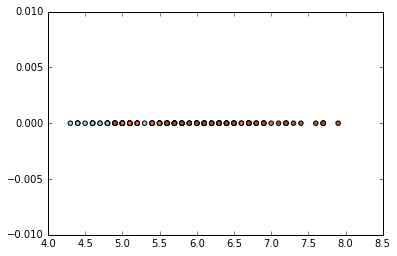

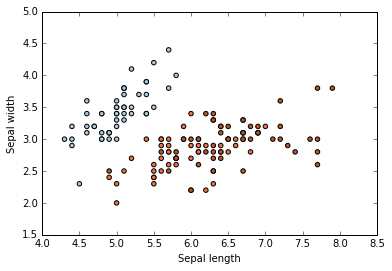

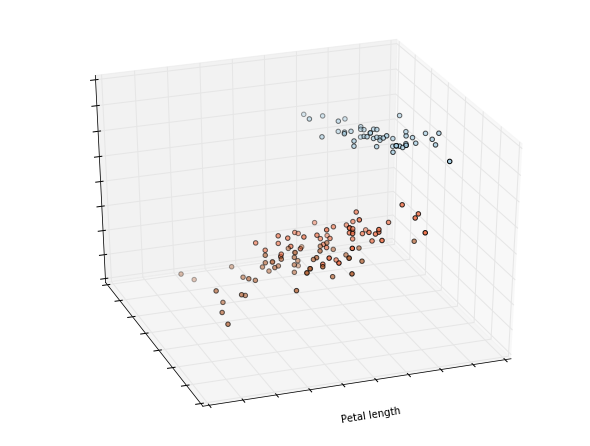

In [203]:
# Example modified from http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(3, figsize=(8, 6))
plt.clf()

#Plot 1d
plt.figure(1)
plt.scatter(X[:, 0],[0]*len(X[:,0]), c=Y, cmap=plt.cm.Paired)

# Plot the training points
plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
fig = plt.figure(3)
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_xlabel("Sepal length")
ax.w_xaxis.set_ticklabels([])
ax.set_xlabel("Sepal width")
ax.w_yaxis.set_ticklabels([])
ax.set_xlabel("Petal length")
ax.w_zaxis.set_ticklabels([])
plt.show()


In [187]:
len(X[:, 0])
len(X[:, 1])
#len(X[:, 2])

150

In [190]:
type(X)

numpy.ndarray

In [191]:
X.shape

(150, 2)

In [206]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset="train")

In [207]:
data

{'DESCR': None,
 'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: Univers